<h3>Installations<h3>

In [1]:
#!pip install pyarrow
#pip install pyarrow --upgrade pip
#!pip install fastparquet
#pip install fastparquet --upgrade pip
#pip install colorama
#pip install umap
#pip install hmmlearn
#pip install ruamel_yaml
#pip install umap-learn

<h3>Importations<h3>

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vame
import numpy
import ruamel
import os
from pathlib import Path
import scipy.signal
from scipy.stats import iqr
import matplotlib.pyplot as plt
from datetime import datetime as dt
from vame.util.auxiliary import read_config
import torch
import math
from math import floor
import random
from vame.analysis.tree_hierarchy import graph_to_tree, draw_tree, traverse_tree_cutline, hierarchy_pos
import json
import yaml
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
import functions

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-7smd2jw6 because the default path (/home/epic_euclid/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using CUDA
GPU active: True
GPU used: NVIDIA GeForce GTX 1080 Ti


2023-03-29 20:08:57.690309: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 20:08:58.956543: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:
2023-03-29 20:08:58.956750: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:
2023-03-29 20:08:5

<h3>Location of parquet files<h3>

Before starting, go to __*functions.py*__ and enter the path to the folder containing the parquet files in the variable '__path_parquet__'

<h3>Choice of trips within a file<h3>

In [2]:
# Warning : Columns must include 'trip'
columns=["Distance_to_CIPV","LongitudinalAccelCorrected","TransversalAccelCorrected","VehicleSpeed","trip"]
num_parquet='0090_0094'

Displaying **statistics** for the trips choice

In [3]:
stats=functions.show_parquet_stats(num_parquet,columns)

/home/epic_euclid/workdir/Projet_Infonum/projet-infonum-renault/VAME/VAME/functions.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace("",np.nan,inplace=True)
/home/epic_euclid/workdir/Projet_Infonum/projet-infonum-renault/VAME/VAME/functions.py:61: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  for i in data[data['trip'].isin([trip])].std():
/home/epic_euclid/workdir/Projet_Infonum/projet-infonum-renault/VAME/VAME/functions.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

In [4]:
stats

,trip,Deviation Score,Speed Deviation,length
0,CERTIF_HHN_1995_AEB_20211120_115232,4.269585,23.640100,42345
1,CERTIF_HHN_1995_AEB_20211120_100111,2.859845,29.501591,33105
2,CERTIF_HHN_1995_AEB_20211120_135234,2.745395,39.321709,31767
120,CERTIF_HHN_1995_AEB_20211122_153120,2.712328,28.010551,8864
3,CERTIF_HHN_1995_AEB_20211119_151332,2.520026,20.745449,45050
...,...,...,...,...
101,CERTIF_HHN_1995_AEB_20211120_134333,0.000000,8.398322,1802
100,CERTIF_HHN_1955_AEB_20220307_124203,0.000000,16.269424,2703
99,CERTIF_HHN_1955_AEB_20220307_141931,0.000000,8.035696,901
98,CERTIF_HHN_1995_AEB_20211119_112701,0.000000,15.088907,901


Trips **choice** (You should choose the trips maximizing the deviation score)

In [5]:
trips=['CERTIF_HHN_1995_AEB_20211120_115232','CERTIF_HHN_1995_AEB_20211120_100111']

<h3>Project Creation<h3>

Project initialization (You only have to run the cell below **ONCE**, when **creating the project for THE FIRST TIME**)

In [7]:
functions.Vame_parquet(num_parquet, columns, trips,name="7Clusters-5s")

Project "/home/epic_euclid/workdir/Projet_Infonum/projet-infonum-renault/VAME/VAME/VAME/VAME/VAME-0090_0094-7Clusters-5s-Mar29-2023" already exists!

You can't create two projects with the same name during the same day !


**Config file definition**, Copy the string above (config = ...) and paste it below

In [8]:
config = '/home/epic_euclid/workdir/Projet_Infonum/projet-infonum-renault/VAME/VAME/VAME/VAME/VAME-0090_0094-7Clusters-5s-Feb27-2023/config.yaml'

config_file = Path(config).resolve()
cfg = read_config(config_file)
n_cluster=cfg['n_cluster']
project_path=cfg['project_path']

You can now **train the model**, go to config.yaml to **choose the model parameters** (e.g kmeans **cluters number**)

<h3>Model Training<h3>

In [7]:
# Step 2:
# Train VAME:
vame.train_model(config)

Train Variational Autoencoder - model name: VAME 

Using CUDA
GPU active: True
GPU used:  NVIDIA GeForce GTX 1080 Ti
Latent Dimensions: 30, Time window: 50, Batch Size: 256, Beta: 1, lr: 0.0005

Initialize train data. Datapoints 67905
Initialize test data. Datapoints 7545
Scheduler step size: 100, Scheduler gamma: 0.20

Start training... 
Epoch: 1
Train loss: 17123.430, MSE-Loss: 12661.262, MSE-Future-Loss 4462.168, KL-Loss: 0.000, Kmeans-Loss: 0.000, weight: 0.00
Test loss: 1325.165, MSE-Loss: 1325.165, KL-Loss: 0.000, Kmeans-Loss: 0.000


Epoch: 2
Train loss: 4872.856, MSE-Loss: 3288.936, MSE-Future-Loss 1583.920, KL-Loss: 0.000, Kmeans-Loss: 0.000, weight: 0.00
Test loss: 744.544, MSE-Loss: 744.544, KL-Loss: 0.000, Kmeans-Loss: 0.000


Epoch: 3
Train loss: 3483.602, MSE-Loss: 2107.168, MSE-Future-Loss 1374.373, KL-Loss: 1.566, Kmeans-Loss: 0.496, weight: 0.25
Test loss: 528.674, MSE-Loss: 526.488, KL-Loss: 1.720, Kmeans-Loss: 0.466


Epoch: 4
Train loss: 3043.009, MSE-Loss: 1748.048

<h3>Model Evaluation (Losses and reconstruction)<h3>

Using CUDA
GPU active: True
GPU used: NVIDIA GeForce GTX 1080 Ti


Evaluation of VAME model. 

Initialize test data. Datapoints 7545
You can find the results of the evaluation in '/Your-VAME-Project-Apr30-2020/model/evaluate/' 
OPTIONS:
- vame.behavior_segmentation() to identify behavioral motifs.
- re-run the model for further fine tuning. Check again with vame.evaluate_model()


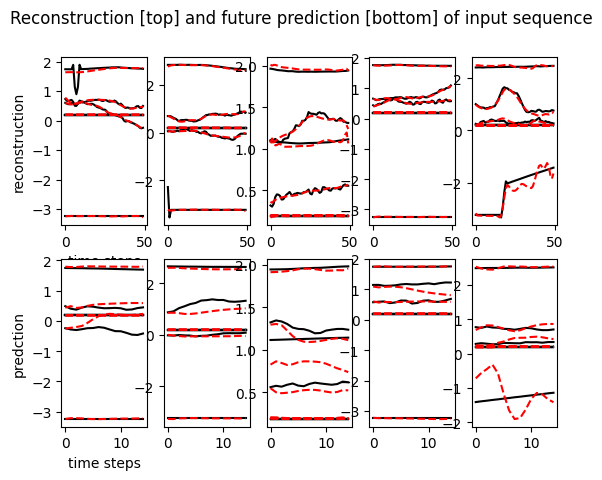

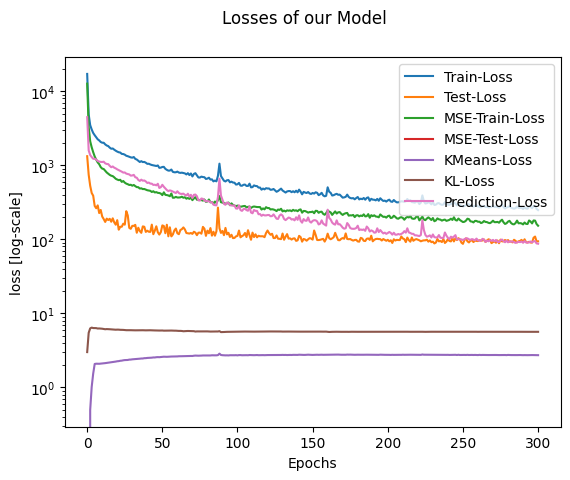

In [12]:
# Step 3:
# Evaluate model
vame.evaluate_model(config)

<h3>Segmentation into Clusters <h3>

The cell below computes a parametrization for clustering

In [8]:
vame.pose_segmentation(config)

Pose segmentation for VAME model: VAME 

Using CUDA
GPU active: True
GPU used: NVIDIA GeForce GTX 1080 Ti

For model VAME a latent vector embedding already exists. 
Parameterization of latent vector with 12 k-Means cluster


Do you want to continue? A new parameterization will be computed! (yes/no)  no


No new parameterization has been calculated.


The cell below creates behavioural hierarchies via **community detection** and shows a **fixed image of the tree** (the following steps will allow us to display this same tree, but in a dynamic way)

/home/epic_euclid/workdir/Projet_Infonum/projet-infonum-renault/VAME/VAME/vame/analysis/tree_hierarchy.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  cost = (motif_norm[i] + motif_norm[j]) / np.abs(transition_matrix[i,j] + transition_matrix[j,i] )
/home/epic_euclid/workdir/Projet_Infonum/projet-infonum-renault/VAME/VAME/vame/analysis/tree_hierarchy.py:67: RuntimeWarning: invalid value encountered in double_scalars
  cost = (motif_norm[i] + motif_norm[j]) / np.abs(transition_matrix[i,j] + transition_matrix[j,i] )


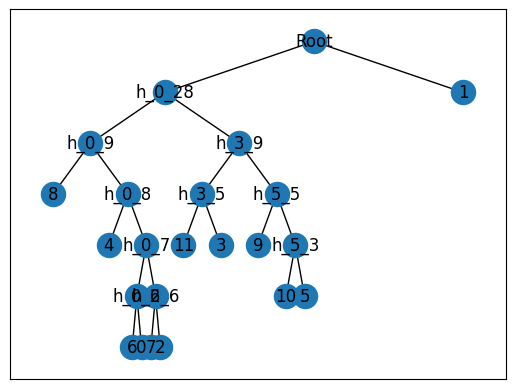

In [9]:
# OPTIONAL: Create behavioural hierarchies via community detection
vame.community(config, show_umap=False, cut_tree=2)

<h3>Clusters Visualization & Analysis<h3>

Displaying the **transition matrix** 

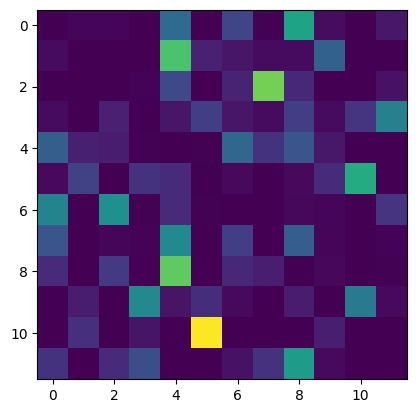

In [10]:
Path_transition_matrix=os.path.join(project_path,"results", "video-1",'VAME',"kmeans-"+str(n_cluster),"community","transition_matrix_video-1.npy")

Transition_matrix=np.load(Path_transition_matrix)
plt.imshow(Transition_matrix)

**T-sne** Visualization

Visualizing 30000 data points.. 


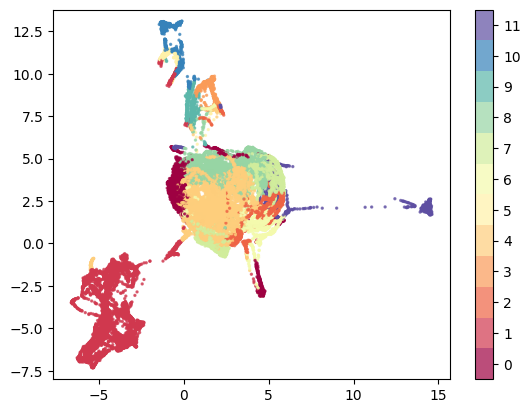

In [11]:
vame.visualization(config, label='motif')

Retrieval of cluster **labelling data**

In [12]:
#Copy the path to km_label_video-1.npy
Path_label=os.path.join(project_path,"results", "video-1",'VAME',"kmeans-"+str(n_cluster),str(n_cluster)+"_km_label_video-1.npy")
data_label=np.load(Path_label)
data_ = functions.open_scale_clean_parquet(num_parquet,columns, scaling=False)
df=data_[data_['trip'].isin(trips)]
df=df.drop("trip",axis=1)
cluster_echantillon = functions.get_cluster_echantillon(data_label, config, len_echantillon=5)
if "trip" in columns:
    columns.remove("trip")

/home/epic_euclid/workdir/Projet_Infonum/projet-infonum-renault/VAME/VAME/functions.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace("",np.nan,inplace=True)


Clusters' **Frequency** and **Stability** computation 

In [13]:
functions.frequency_stability(data_label,config)

,frequency,stability (s)
0,8 %,3.070792
1,18 %,32.229268
2,5 %,2.970149
3,6 %,10.814634
4,23 %,5.256481
5,7 %,9.939623
6,5 %,2.229775
7,7 %,3.624138
8,11 %,3.478512
9,2 %,2.444898


The cell below allows to **plot the obtained signals**, either by cluster or by signal.

-----------------------------------------------------------------------------


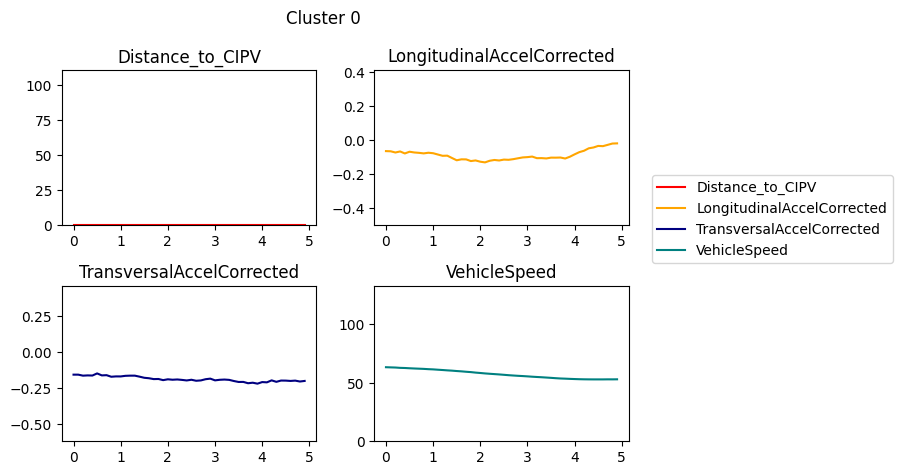

-----------------------------------------------------------------------------


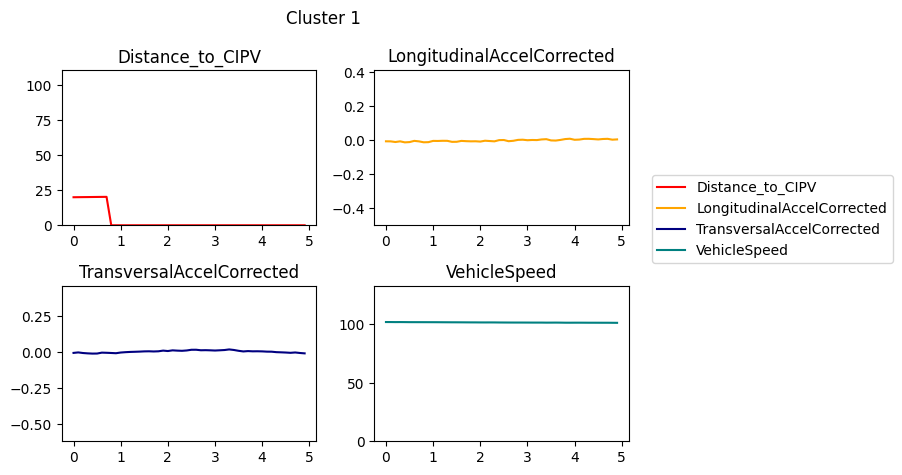

-----------------------------------------------------------------------------


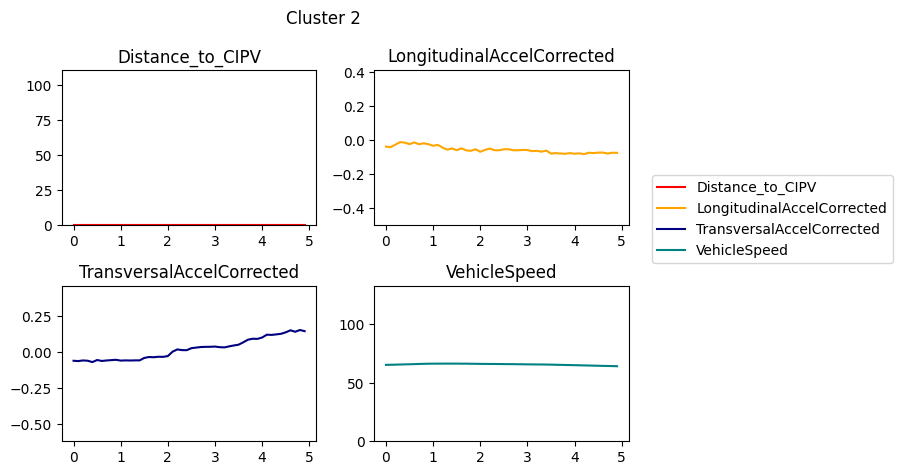

-----------------------------------------------------------------------------


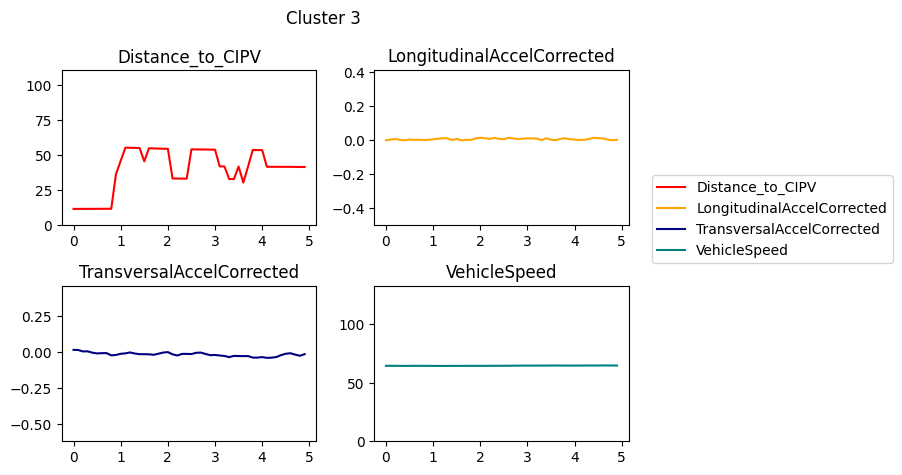

-----------------------------------------------------------------------------


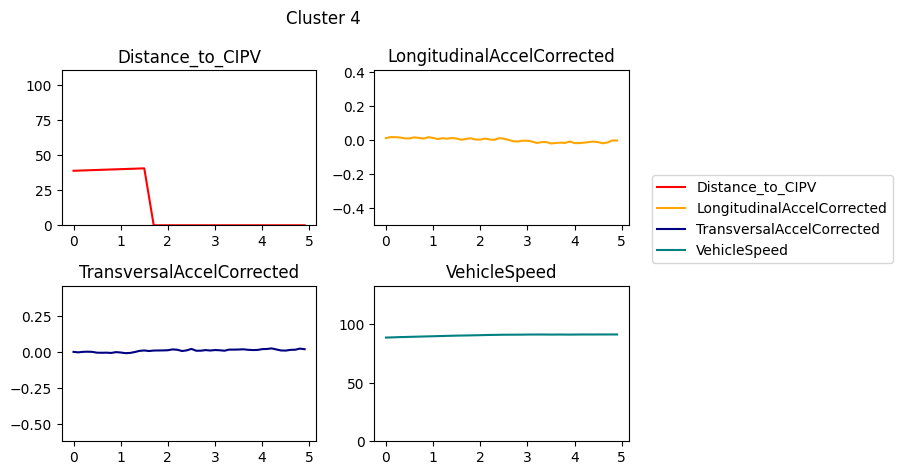

-----------------------------------------------------------------------------


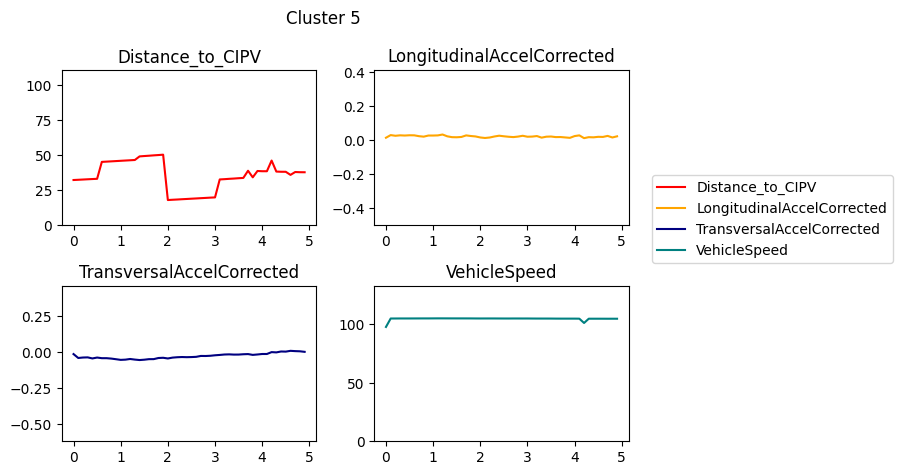

-----------------------------------------------------------------------------


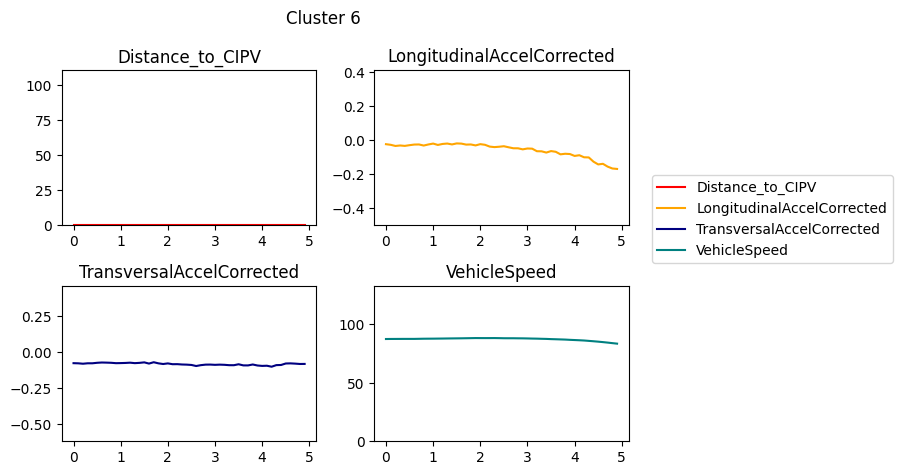

-----------------------------------------------------------------------------


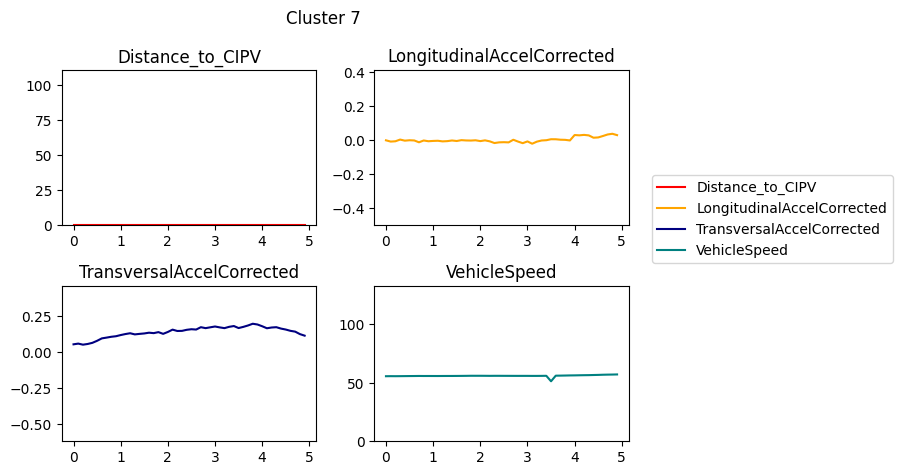

-----------------------------------------------------------------------------


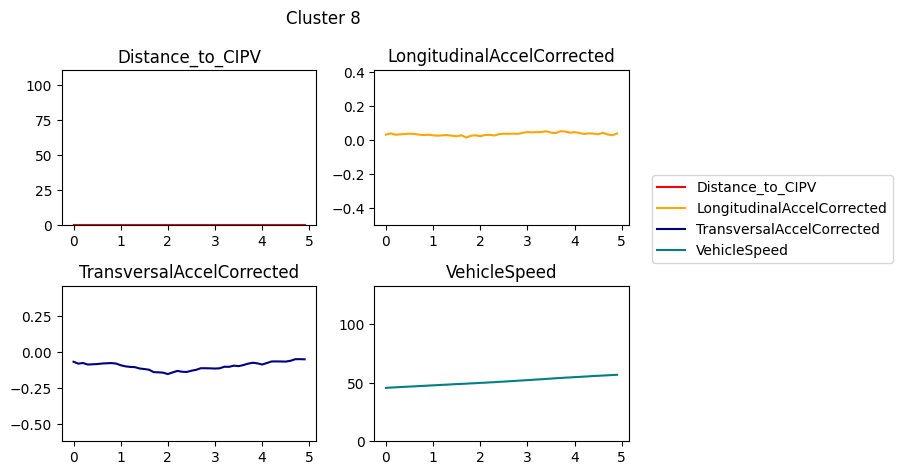

-----------------------------------------------------------------------------


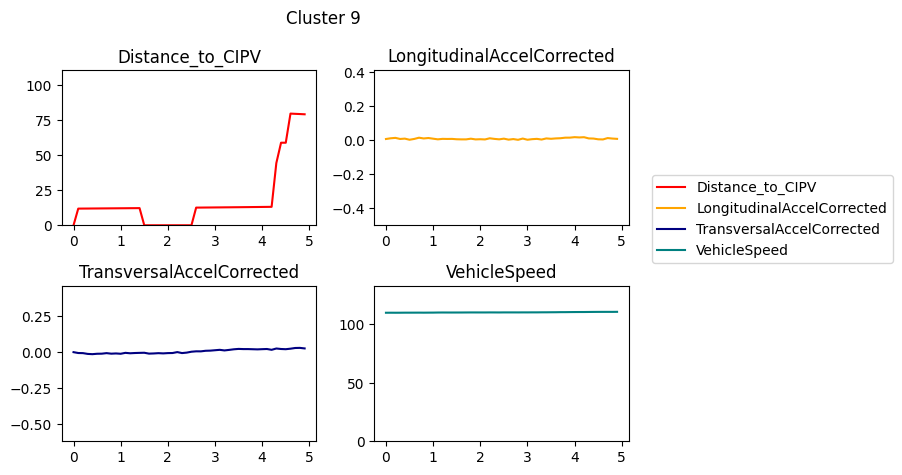

-----------------------------------------------------------------------------


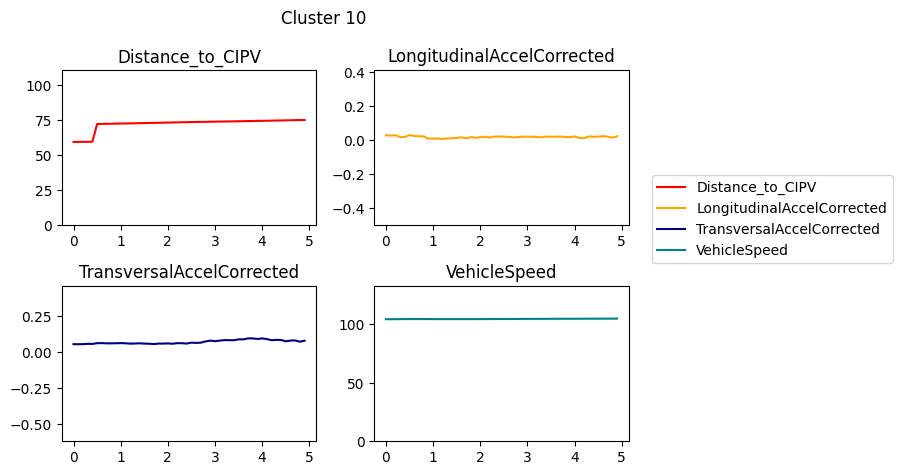

-----------------------------------------------------------------------------


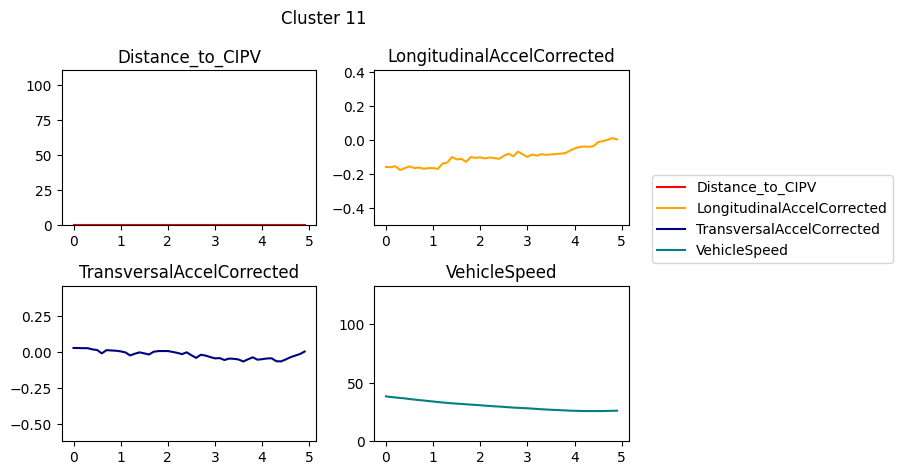

In [14]:
functions.plot_par_cluster(cluster_echantillon, df, columns, config, mean=True, show=True, save=False)
#functions.plot_par_signal(cluster_echantillon_3s, df, columns, config, mean=True, show_title=False)

The cell below allows to **save** not only the obtained **signals**, but also the **shape of the tree** and the **community hierarchies**

In [13]:
functions.save_hierarchy_edges(config, df, columns_, mean=False, len_echantillon=4)

/home/epic_euclid/workdir/Projet_Infonum/projet-infonum-renault/VAME/VAME/vame/analysis/tree_hierarchy.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  cost = (motif_norm[i] + motif_norm[j]) / np.abs(transition_matrix[i,j] + transition_matrix[j,i] )
/home/epic_euclid/workdir/Projet_Infonum/projet-infonum-renault/VAME/VAME/vame/analysis/tree_hierarchy.py:67: RuntimeWarning: invalid value encountered in double_scalars
  cost = (motif_norm[i] + motif_norm[j]) / np.abs(transition_matrix[i,j] + transition_matrix[j,i] )


Les courbes ont bien été sauvegardées.
Veuiller copier le lien ci-dessous et le coller en appliquant dynamic_tree.py :

/home/epic_euclid/workdir/Projet_Infonum/projet-infonum-renault/VAME/VAME/VAME/VAME/VAME-0090_0094-7Clusters-5s-Feb27-2023/config.yaml


Once you have properly executed __*save_hierarchies_edges*__, you can __open a terminal__, go to the **location** of this Notebook, **activate the VAME environment** and execute: **"python dynamic_tree.py"** So you can see the dynamic tree.

<h3>Silhouette<h3>

The cell below allows to judge the quality of clusters, using __Silhouette__

In [20]:
silhouette_score_calculus(config, [7])

/tmp/ipykernel_2265/2537663042.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace("",np.nan,inplace=True)


Pose segmentation for VAME model: VAME 

Using CUDA
GPU active: True
GPU used: NVIDIA GeForce GTX 1080 Ti

For model VAME a latent vector embedding already exists. 
Parameterization of latent vector with 7 k-Means cluster


Do you want to continue? A new parameterization will be computed! (yes/no)  no


No new parameterization has been calculated.


AttributeError: module 'vame' has no attribute 'visualization_for_silhouette'